In [72]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

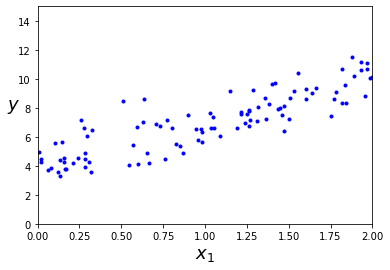

In [73]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [74]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.97973739],
       [2.998904  ]])

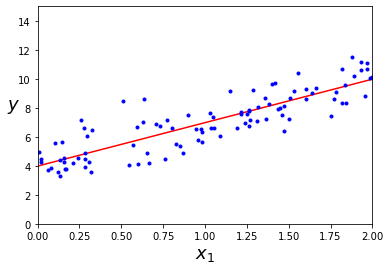

In [75]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.97973739] [[2.998904]]
[[3.97973739]
 [9.97754539]]


In [77]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) # pseudoinversa: linalg.pinv(X_b)
print(theta_best_svd.T, residuals, rank, s)
# svd = singular value decomposition

[[3.97973739 2.998904  ]] [110.32533858] 2 [14.86616371  4.07522001]


In [78]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradient = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradient
theta

array([[3.97973739],
       [2.998904  ]])

In [79]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradient
theta

array([[3.97817099],
       [2.96017667]])

In [80]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91672734]), array([2.92638327]))

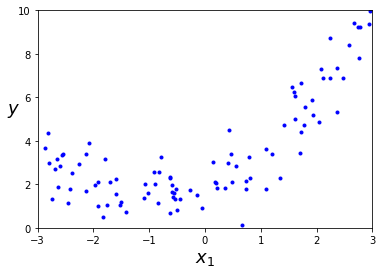

In [81]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-2.74167403]), array([-2.74167403,  7.5167765 ]))

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # eq original: 0.5x^2 + x + 2

(array([1.82922117]), array([[1.03170307, 0.54715478]]))

Text(0, 0.5, 'RMSE')

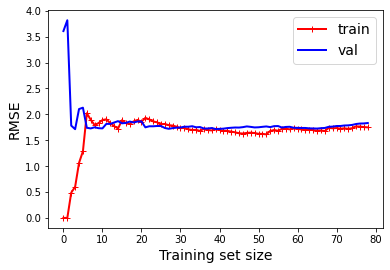

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend(loc="upper right", fontsize=14)   # not shown in the book
plt.xlabel("Training set size", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)              # not shown

(0.0, 80.0, 0.0, 3.0)

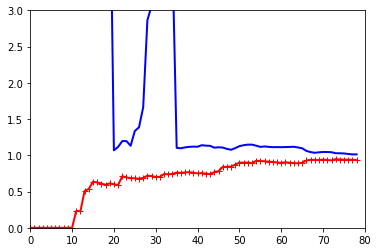

In [85]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

In [86]:
from sklearn.linear_model import Ridge # Ou Lasso
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
print(ridge_reg.predict([[1.5]]))

sgd_regressor = SGDRegressor(penalty='l2')
sgd_regressor.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[[5.0492509]]
[8.30630224]


In [87]:
# Lasso é bom qdo alguns features são úteis. Geralmente Elastic é melhor.
# Lasso pode ser errático quando n_features > n_dados ou qdo há alta correlação dos features
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio = r: r*l1 + (1-r)/2*l2
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([5.00295974])

In [88]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=42)

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005,
                      random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
train_errors, val_errors = [], []
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continua de onde parou (warm_start)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
plt.annotate('Best model',
             xy=(best_epoch, minimum_val_error),
             xytext=(best_epoch, minimum_val_error + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16
            )

print(minimum_val

SyntaxError: unexpected EOF while parsing (<ipython-input-88-7cda60a51377>, line 46)

1.4273015560565776
106


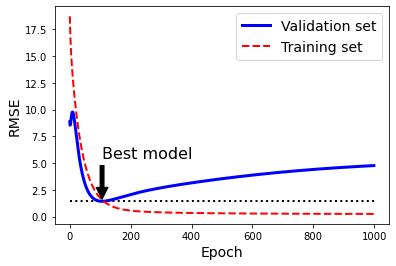

In [89]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=42)

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005,
                      random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
train_errors, val_errors = [], []
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continua de onde parou (warm_start)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
plt.annotate('Best model',
             xy=(best_epoch, minimum_val_error),
             xytext=(best_epoch, minimum_val_error + 4),
             ha="left",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16
            )

print(minimum_val_error)
print(best_epoch)
#minimum_val_error -= 0.03  # just to make the graph look better
plt.plot([0, 1000], [minimum_val_error, minimum_val_error], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [90]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:,3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris virginca, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


LogisticRegression()

C:\Users\Romano\anaconda3\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


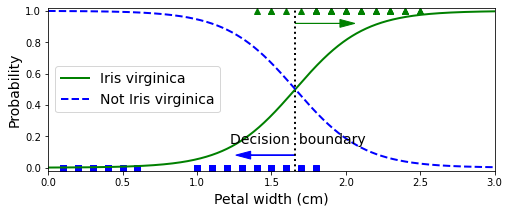

[1 0]


In [91]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()
print(log_reg.predict([[1.7], [1.5]]))

In [92]:
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

print(softmax_reg.predict([[5, 2]])) # class 2, iris virginica
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


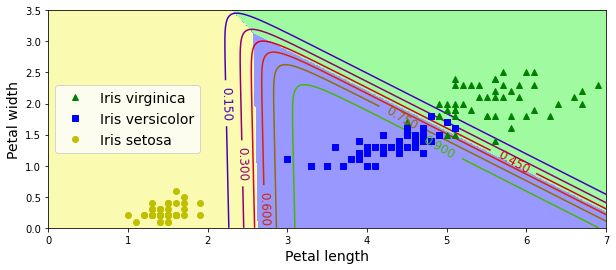

In [94]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()